In [160]:
!pip install nltk

In [161]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("notebooks/youtube_preprocessed_dataset.csv")

In [163]:
df.head()

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


In [164]:
df.shape

(18408, 2)

In [165]:
df.sample()["Comment"].values

array(['quem está lendo o comentário que deus te abençoe e ilumine sempre seu dia '],
      dtype=object)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18408 entries, 0 to 18407
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Comment    18364 non-null  object
 1   Sentiment  18408 non-null  object
dtypes: object(2)
memory usage: 287.8+ KB


In [167]:
df.describe()

,Comment,Sentiment
count,18364,18408
unique,17871,3
top,nice,positive
freq,10,11432


In [168]:
df.isnull().sum()

,0
Comment,44
Sentiment,0


In [169]:
df['Sentiment'].value_counts()

,count
Sentiment,
positive,11432
neutral,4638
negative,2338


In [170]:
df[df["Comment"].isna()].sample(10)

,Comment,Sentiment
11113,NaN,neutral
4347,NaN,neutral
16643,NaN,positive
3235,NaN,positive
4346,NaN,positive
5697,NaN,positive
10492,NaN,neutral
9050,NaN,positive
1041,NaN,positive
1021,NaN,positive


In [171]:
df.dropna(inplace=True)

In [172]:
df.isnull().sum()

,0
Comment,0
Sentiment,0


In [173]:
print(df.duplicated().sum())

490


In [174]:
df[df.duplicated()].sample(10)

,Comment,Sentiment
10533,really relaxing,positive
12563,man did a whole scholarship interview during t...,positive
16700,2323 hermosa elección 18kissxuno los mortales ...,neutral
17933,hilary is exceptional at explaining and engagi...,positive
3620,always good to hear your thoughtful and logica...,positive
12614,this man literally born to create history hats...,positive
17715,► for the next 14 days get 3d art pro for 40 o...,positive
16172,i like that bruce is trying to teach her that ...,neutral
1251,very relaxing video it helped me sleep,positive
11941,one of the best thing about dude is that he ne...,positive


In [175]:
df.drop_duplicates(inplace=True)

In [176]:
df.duplicated().sum()

np.int64(0)

In [177]:
df[(df["Comment"].str.strip() == '')]

,Comment,Sentiment


In [178]:
# df = df[~(df['Comment'].str.strip() == '')]

In [179]:
# Make all the comments to lowercase
df['Comment'] = df['Comment'].str.lower()
df.head()

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


In [180]:
df[df["Comment"].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,Comment,Sentiment
20,linus just turn the key lights 180 and bounce ...,positive
30,unstoppable experiments with liquid nitrogen,positive
35,കേരളത്തിൽ ആദ്യമായി പെട്രോളിനെ എയ്സ് ആക്കിയ m4...,neutral
38,തന്നെ തളർത്താൻ നോക്കിയവർ പോലും അവന്റെ ഉയർച്ചയി...,neutral
39,എത്ര എടുത്താലും തീരാത്ത liquid nitrogen,neutral
...,...,...
18250,wow congratulations for starting such an amazi...,positive
18278,omg such awesome day to day life examples give...,positive
18343,amazing explanation i loved the way you taught,positive
18349,idk if you realise the intensity of positive i...,positive


In [181]:
# Remove trailing and leading whitespaces from the 'Comment' column
df['Comment'] = df['Comment'].str.strip()

# Verify the transformation by checking for any remaining trailing whitespaces
print(df['Comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum())

0


In [182]:
# Identify comments containing URLs
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls = df[df['Comment'].str.contains(url_pattern, regex=True)]

# Display the comments containing URLs
comments_with_urls.head()

,Comment,Sentiment


In [183]:
# Identify comments containing new line characters
comments_with_newline = df[df['Comment'].str.contains('\n')]

# Display the comments containing new line characters
comments_with_newline.head()

,Comment,Sentiment


In [184]:
# # Remove new line characters from the 'Comment' column
# df['Comment'] = df['Comment'].str.replace('\n', ' ', regex=True)

# # Verify the transformation by checking for any remaining new lines
# comments_with_newline_remaining = df[df['Comment'].str.contains('\n')]
# comments_with_newline_remaining

# EDA

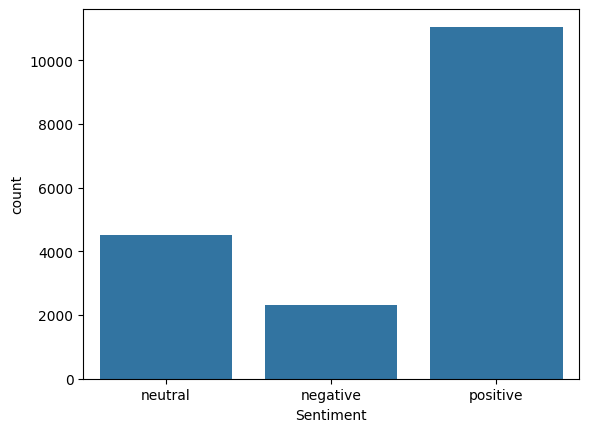

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt
# distribution of classes

sns.countplot(data=df,x="Sentiment")
plt.show()

In [186]:
# frequency distribution of sentiments

df['Sentiment'].value_counts(normalize=True).mul(100).round(2)

,proportion
Sentiment,
positive,61.84
neutral,25.19
negative,12.96


In [187]:
df['word_count'] = df['Comment'].apply(lambda x: len(x.split()))
df.sample(10)

,Comment,Sentiment,word_count
1024,agar value mili ho toh subscribe you can also ...,positive,16
2679,can we all just give this man a round of appla...,positive,34
13533,i would make a joke about gravity but noone wo...,negative,13
30,unstoppable experiments with liquid nitrogen,positive,5
7297,i used to sing this song all the time when i w...,neutral,42
917,chú rikaki thử so famas thám tử 2 tốc bắn và t...,neutral,23
4884,material squares pawns initiative development ...,positive,44
14926,more videos like this please it was precise fu...,positive,13
5683,pixel 7 might be the one for me i want a somew...,positive,20
14827,lamports turing award in 2013 was probably one...,positive,30


In [188]:
df['word_count'].describe()

,word_count
count,17874.000000
mean,32.991664
std,45.526381
min,1.000000
25%,12.000000
50%,21.000000
75%,38.000000
max,1353.000000


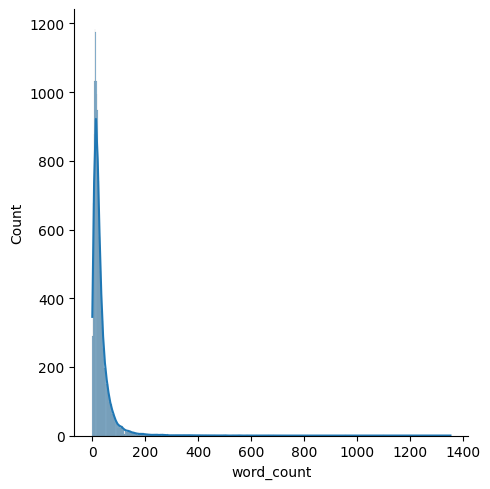

In [189]:
sns.displot(df['word_count'],kde = True)
plt.show()

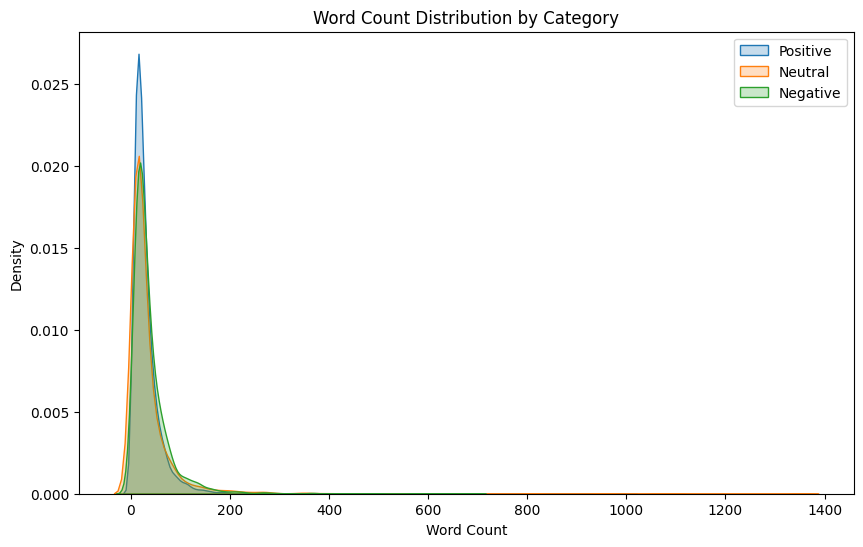

In [190]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category positive(1)
sns.kdeplot(df[df['Sentiment'] == 'positive']['word_count'], label='Positive', fill=True)

# Plot KDE for category neutral(0)
sns.kdeplot(df[df['Sentiment'] == 'neutral']['word_count'], label='Neutral', fill=True)

# Plot KDE for category negative(-1)
sns.kdeplot(df[df['Sentiment'] == 'negative']['word_count'], label='Negative', fill=True)

# Add title and labels
plt.title('Word Count Distribution by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

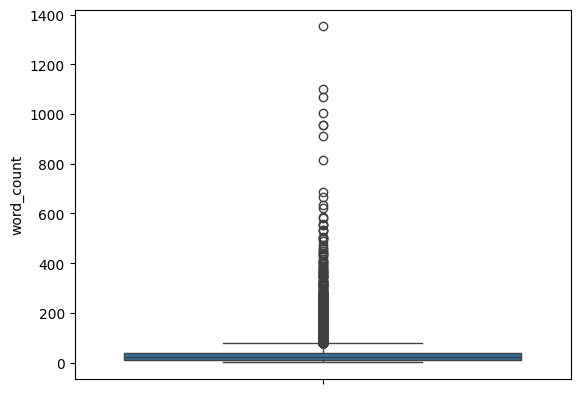

In [191]:
sns.boxplot(df['word_count'])
plt.show()

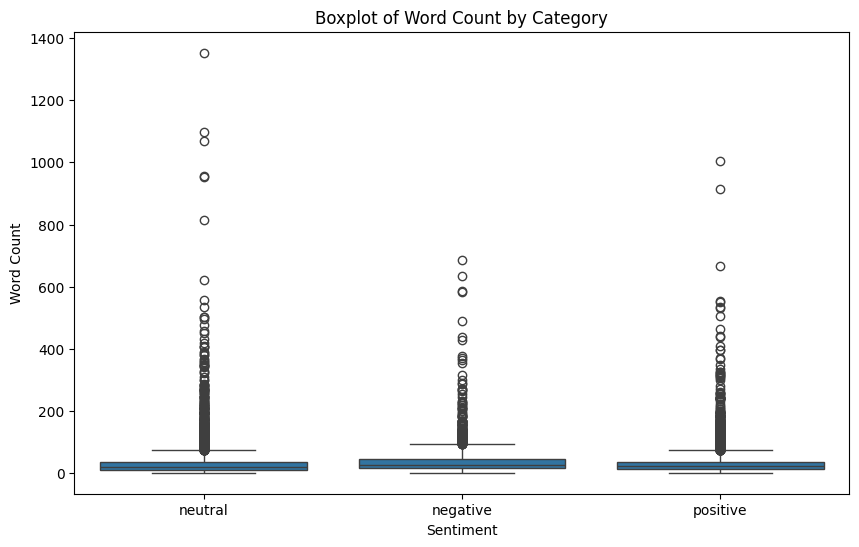

In [192]:
# Create a boxplot for the 'word_count' column categorized by 'Sentiments'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Sentiment', y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Sentiment')
plt.ylabel('Word Count')
plt.show()

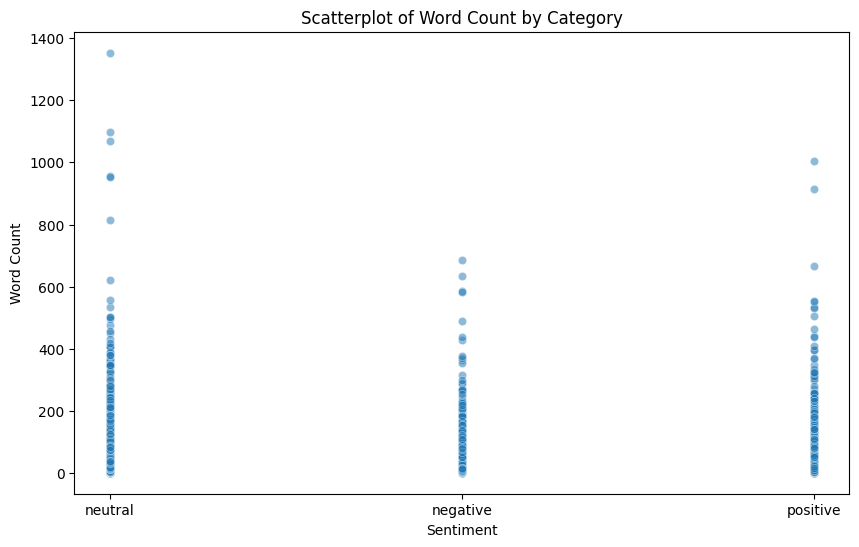

In [193]:
# Create a scatterplot between 'Sentiment' and 'word_count'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sentiment', y='word_count', alpha=0.5)
plt.title('Scatterplot of Word Count by Category')
plt.xlabel('Sentiment')
plt.ylabel('Word Count')
plt.show()

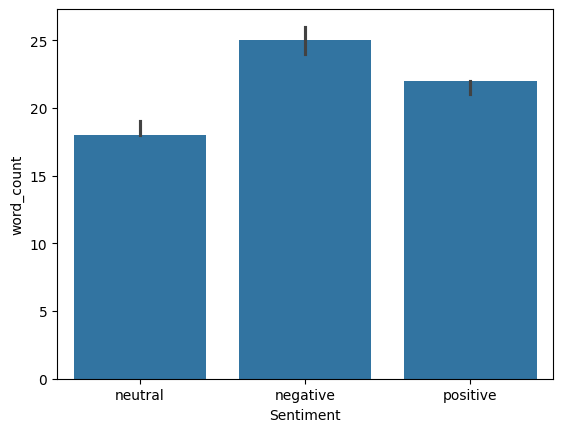

In [194]:
# median word counts among sentiments

sns.barplot(df,x='Sentiment',y='word_count',estimator='median')
plt.show()

In [195]:
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
import nltk
nltk.download('stopwords')

# Define the list of English stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [196]:
# Create a new column 'num_stop_words' by counting the number of stopwords in each comment
df['num_stop_words'] = df['Comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

In [197]:
df.sample(5)

,Comment,Sentiment,word_count,num_stop_words
11005,amazing nature and wildlife on earth,positive,6,2
14271,should i upload daily also make sure to like t...,positive,13,5
3152,si tan solo fuera así de fácil conseguir novia,neutral,9,0
762,singhayosinghayokiyala umbalama muddharayak gh...,neutral,20,0
10462,yesterday i watched kartikey 2 full of goosebumps,positive,8,2


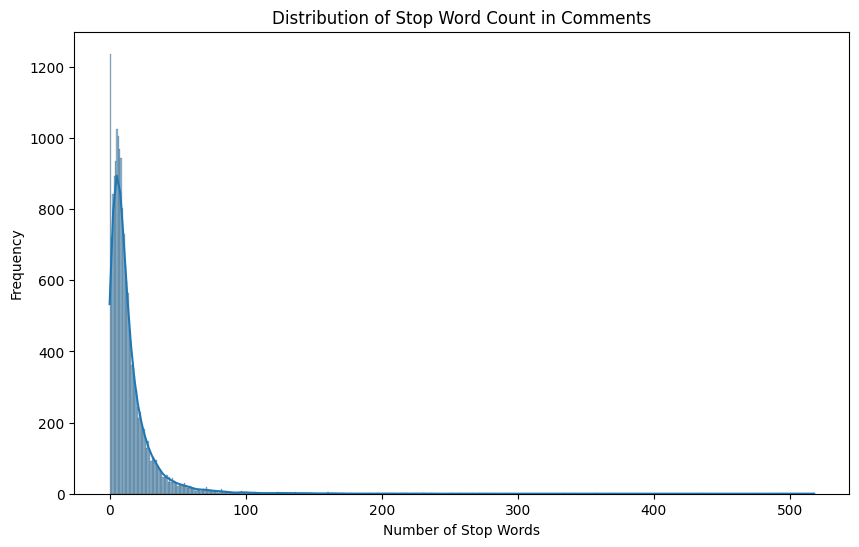

In [198]:
# Create a distribution plot (displot) for the 'num_stop_words' column
plt.figure(figsize=(10, 6))
sns.histplot(df['num_stop_words'], kde=True)
plt.title('Distribution of Stop Word Count in Comments')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()

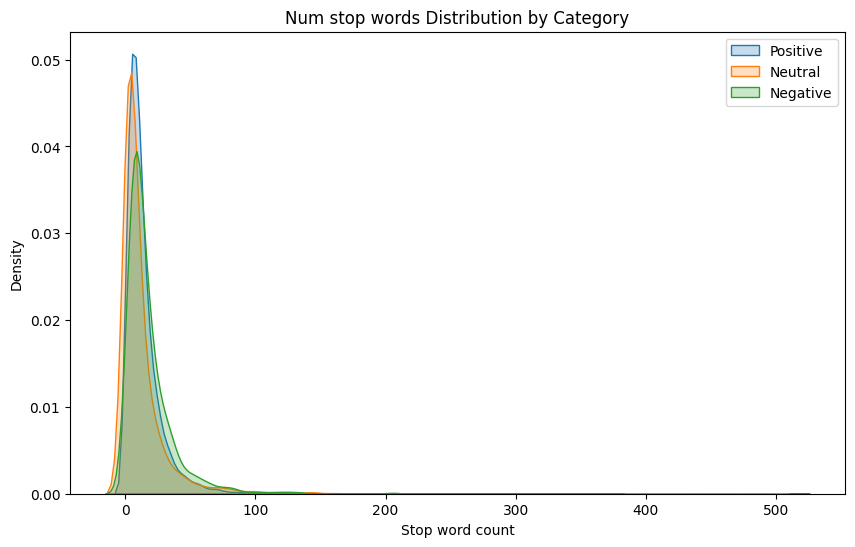

In [199]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category positive(1)
sns.kdeplot(df[df['Sentiment'] == 'positive']['num_stop_words'], label='Positive', fill=True)

# Plot KDE for category neutral(0)
sns.kdeplot(df[df['Sentiment'] == 'neutral']['num_stop_words'], label='Neutral', fill=True)

# Plot KDE for category negative(-1)
sns.kdeplot(df[df['Sentiment'] == 'negative']['num_stop_words'], label='Negative', fill=True)

# Add title and labels
plt.title('Num stop words Distribution by Category')
plt.xlabel('Stop word count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

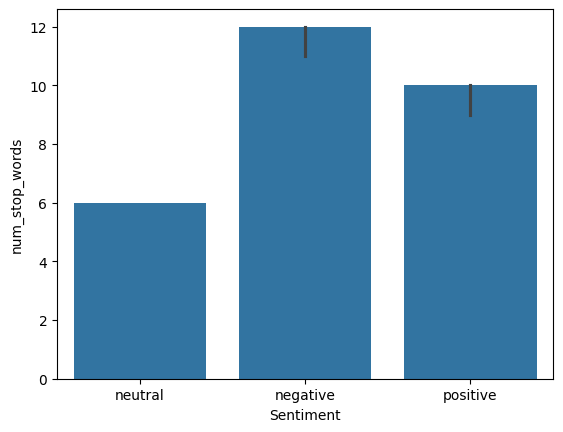

In [200]:
# median word counts among sentiments

sns.barplot(df,x='Sentiment',y='num_stop_words',estimator='median')
plt.show()

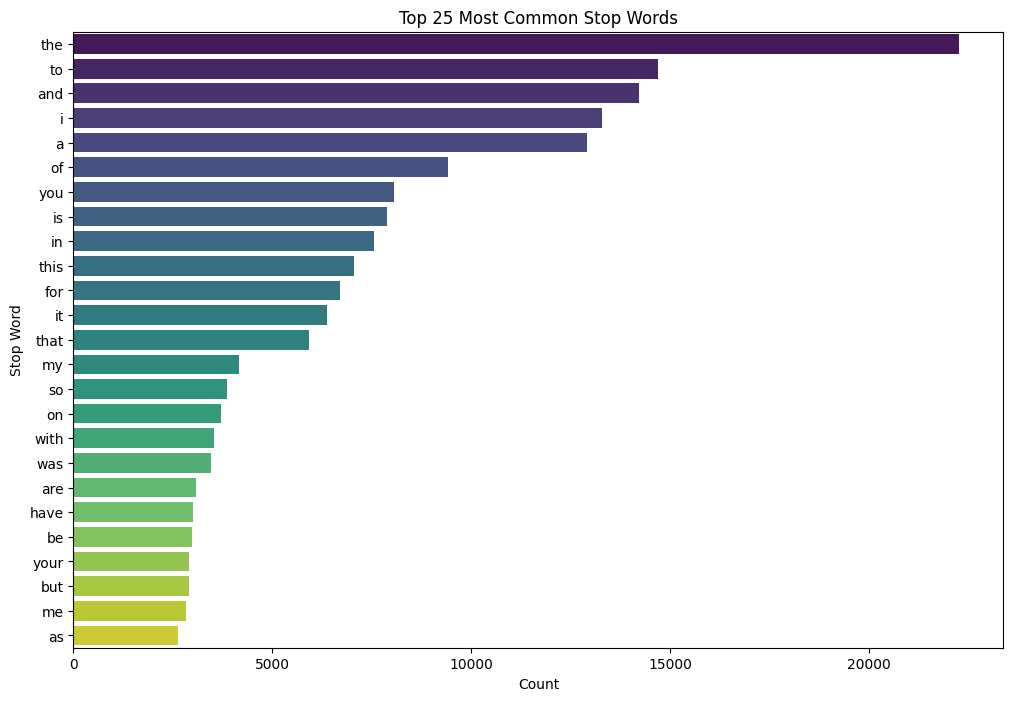

In [201]:
# Create a frequency distribution of stop words in the 'Comment' column
from collections import Counter

# Extract all stop words from the comments
all_stop_words = [word for comment in df['Comment'] for word in comment.split() if word in stop_words]

# Count the most common stop words
most_common_stop_words = Counter(all_stop_words).most_common(25)

# Convert the most common stop words to a DataFrame for plotting
top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

# Create the barplot for the top 25 most common stop words
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()

In [202]:
# Count the number of characters per comment
df['num_chars'] = df['Comment'].apply(len)

df.head()

,Comment,Sentiment,word_count,num_stop_words,num_chars
0,lets not forget that apple pay in 2014 require...,neutral,57,23,317
1,here in nz 50 of retailers don’t even have con...,negative,29,10,163
2,i will forever acknowledge this channel with t...,positive,31,16,183
3,whenever i go to a place that doesn’t take app...,negative,83,34,450
4,apple pay is so convenient secure and easy to ...,positive,26,12,135


In [203]:
df['num_chars'].describe()

,num_chars
count,17874.000000
mean,177.567976
std,252.165111
min,2.000000
25%,66.000000
50%,113.000000
75%,201.000000
max,7847.000000


In [204]:
from collections import Counter

# Combine all comments into one large string
all_text = ' '.join(df['Comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

In [205]:
char_frequency_df['character'].values

array([' ', 'e', 't', ..., '🇭', '🇹', '🇸'], dtype=object)

In [206]:
char_frequency_df.sample(50)

,character,frequency
360,р,143
371,ь,68
1220,念,2
898,봄,2
1533,石,1
477,น,102
41,ര,5
1379,묵,2
1120,大,18
1170,燒,1


In [207]:
# Create a new column 'num_punctuation_chars' to count punctuation characters in each comment
df['num_punctuation_chars'] = df['Comment'].apply(
    lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-'])
)

df.sample(10)

,Comment,Sentiment,word_count,num_stop_words,num_chars,num_punctuation_chars
2625,the first thing i want you to knowwhom ever yo...,positive,319,186,1488,0
3203,great content i feel those who would allow the...,positive,125,55,674,0
2310,great ideas gillian thank you we have a youtub...,positive,18,8,100,0
5911,this is one of the best videos on the topic of...,positive,59,31,291,0
7801,james is one of the most terrifying people ive...,negative,13,5,64,0
15834,microsoft is helping developers financially to...,neutral,48,25,252,0
3349,165 in 2019 389 last week,neutral,6,1,25,0
3076,she has that voice which we have in our head w...,positive,16,12,74,0
1332,the fans’ eruption on both goals and on the fi...,neutral,16,8,82,0
3950,i like how you had to say you were scrambling ...,neutral,21,11,107,0


In [208]:
df['num_punctuation_chars'].describe()

,num_punctuation_chars
count,17874.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


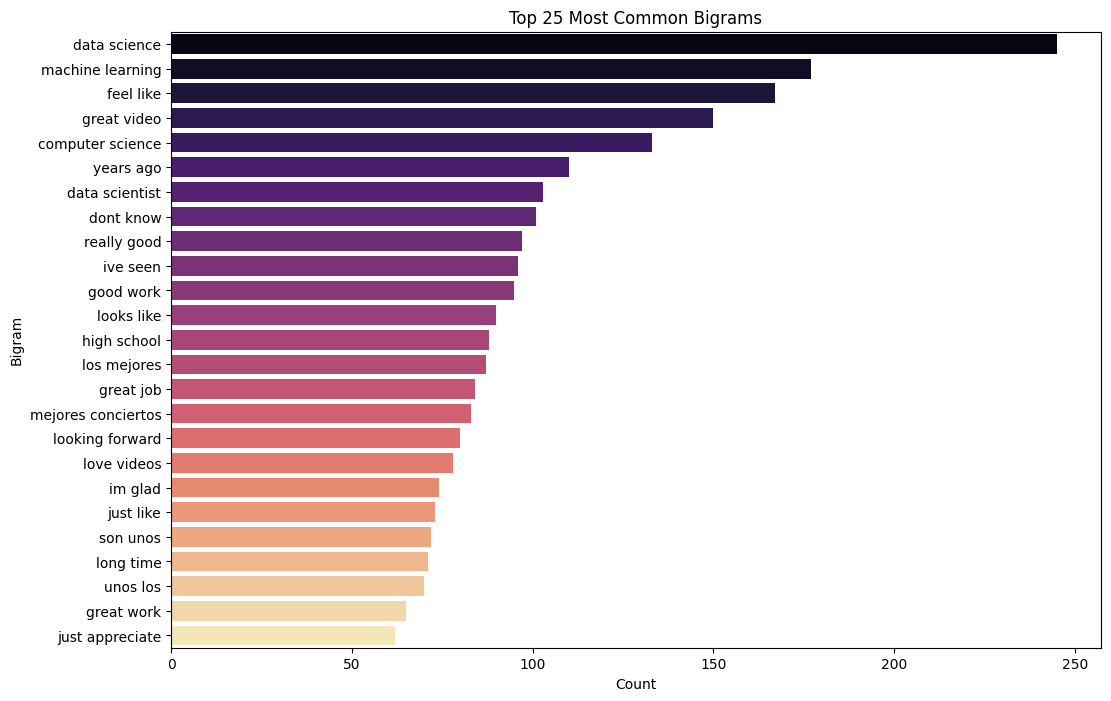

In [209]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a function to extract the top 25 bigrams
def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 bigrams
top_25_bigrams = get_top_ngrams(df['Comment'], 25)

# Convert the bigrams into a DataFrame for plotting
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])

# Plot the countplot for the top 25 bigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

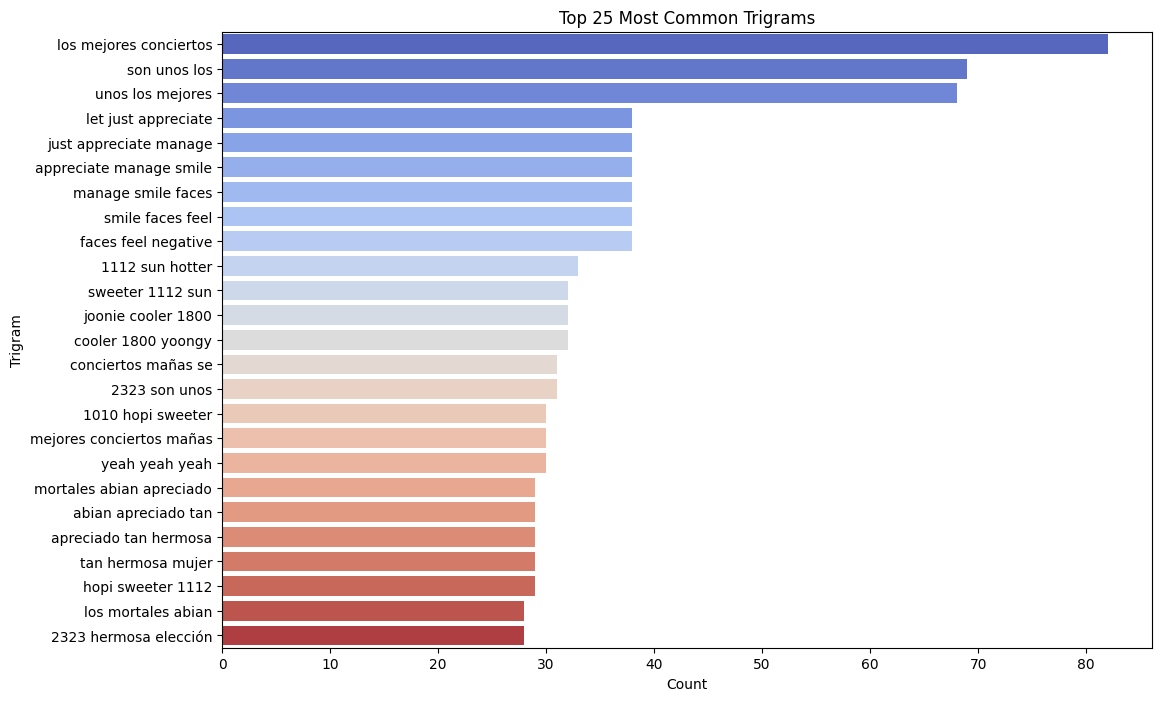

In [210]:
# Create a function to extract the top 25 trigrams
def get_top_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 trigrams
top_25_trigrams = get_top_trigrams(df['Comment'], 25)

# Convert the trigrams into a DataFrame for plotting
top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=['trigram', 'count'])

# Plot the countplot for the top 25 trigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

In [211]:
# Remove non-English characters from the 'Comment' column
# Keeping only standard English letters, digits, and common punctuation
import re

df['Comment'] = df['Comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))

In [212]:
all_text = ' '.join(df['Comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

char_frequency_df

,character,frequency
4,,590996
1,e,301435
2,t,225325
11,a,207323
6,o,200811
14,i,192615
5,n,172531
3,s,168467
8,r,137793
10,h,120846


In [213]:
df.head()

,Comment,Sentiment,word_count,num_stop_words,num_chars,num_punctuation_chars
0,lets not forget that apple pay in 2014 require...,neutral,57,23,317,0
1,here in nz 50 of retailers dont even have cont...,negative,29,10,163,0
2,i will forever acknowledge this channel with t...,positive,31,16,183,0
3,whenever i go to a place that doesnt take appl...,negative,83,34,450,0
4,apple pay is so convenient secure and easy to ...,positive,26,12,135,0


In [214]:
from nltk.corpus import stopwords

# Defining stop words but keeping essential ones for sentiment analysis
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

# Remove stop words from 'Comment' column, retaining essential ones
df['Comment'] = df['Comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)

In [215]:
df.head()

,Comment,Sentiment,word_count,num_stop_words,num_chars,num_punctuation_chars
0,lets not forget apple pay 2014 required brand ...,neutral,57,23,317,0
1,nz 50 retailers dont even contactless credit c...,negative,29,10,163,0
2,forever acknowledge channel help lessons ideas...,positive,31,16,183,0
3,whenever go place doesnt take apple pay doesnt...,negative,83,34,450,0
4,apple pay convenient secure easy use used kore...,positive,26,12,135,0


In [216]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'Comment' column
df['Comment'] = df['Comment'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Comment,Sentiment,word_count,num_stop_words,num_chars,num_punctuation_chars
0,let not forget apple pay 2014 required brand n...,neutral,57,23,317,0
1,nz 50 retailer dont even contactless credit ca...,negative,29,10,163,0
2,forever acknowledge channel help lesson idea e...,positive,31,16,183,0
3,whenever go place doesnt take apple pay doesnt...,negative,83,34,450,0
4,apple pay convenient secure easy use used kore...,positive,26,12,135,0


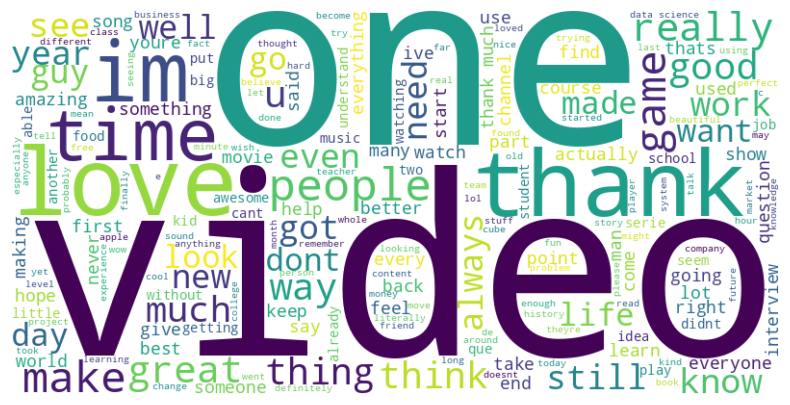

In [217]:
from wordcloud import WordCloud

def plot_word_cloud(text):
    """Overall word cloud for all comments"""
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df['Comment'])

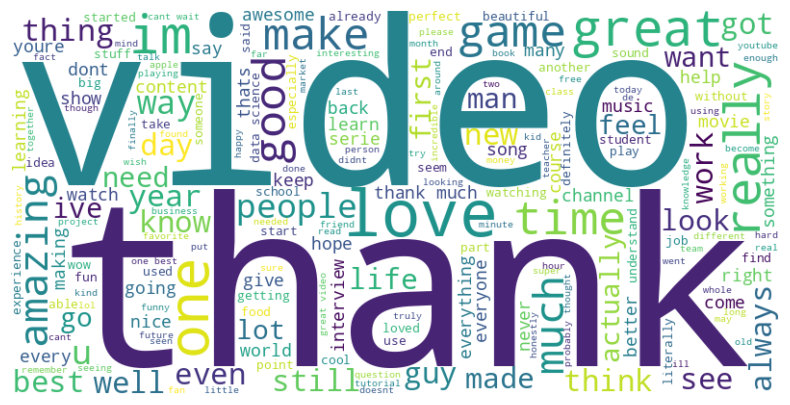

In [218]:
def plot_word_cloud(text):
    """Overall word cloud for positive comments"""
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['Sentiment'] == 'positive']['Comment'])

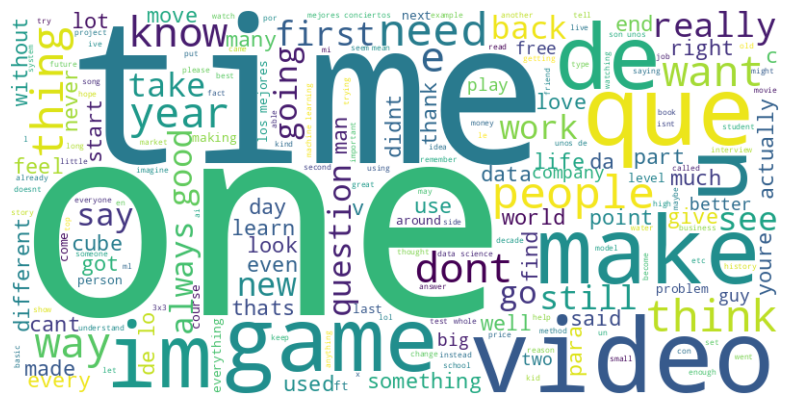

In [219]:
def plot_word_cloud(text):
    """Overall word cloud for neutral comments"""
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['Sentiment'] == 'neutral']['Comment'])

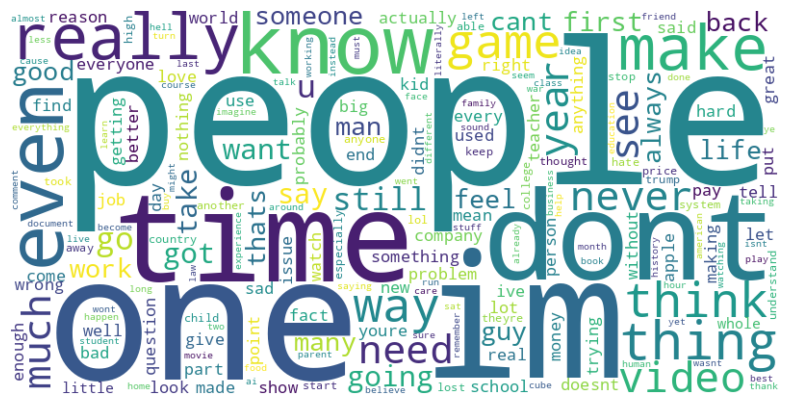

In [220]:
def plot_word_cloud(text):
    """Overall word cloud for negative comments"""
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['Sentiment'] == 'negative']['Comment'])

In [221]:
sentiment_mapping = {
    'positive': 1,
    'negative': -1,
    'neutral': 0
}

df['Sentiment'] = df['Sentiment'].map(sentiment_mapping)


In [222]:
df.head()

,Comment,Sentiment,word_count,num_stop_words,num_chars,num_punctuation_chars
0,let not forget apple pay 2014 required brand n...,0,57,23,317,0
1,nz 50 retailer dont even contactless credit ca...,-1,29,10,163,0
2,forever acknowledge channel help lesson idea e...,1,31,16,183,0
3,whenever go place doesnt take apple pay doesnt...,-1,83,34,450,0
4,apple pay convenient secure easy use used kore...,1,26,12,135,0


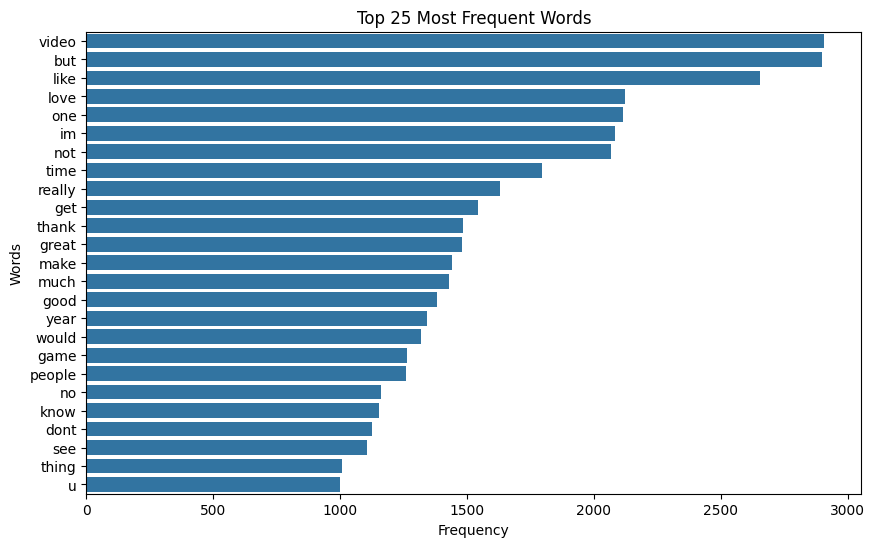

In [223]:
def plot_top_n_words(df, n=20):
    """Plot the top N most frequent words in the dataset."""
    # Flatten all words in the content column
    words = ' '.join(df['Comment']).split()

    # Get the top N most common words
    counter = Counter(words)
    most_common_words = counter.most_common(n)

    # Split the words and their counts for plotting
    words, counts = zip(*most_common_words)

    # Plot the top N words
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Example usage
plot_top_n_words(df, n=25)

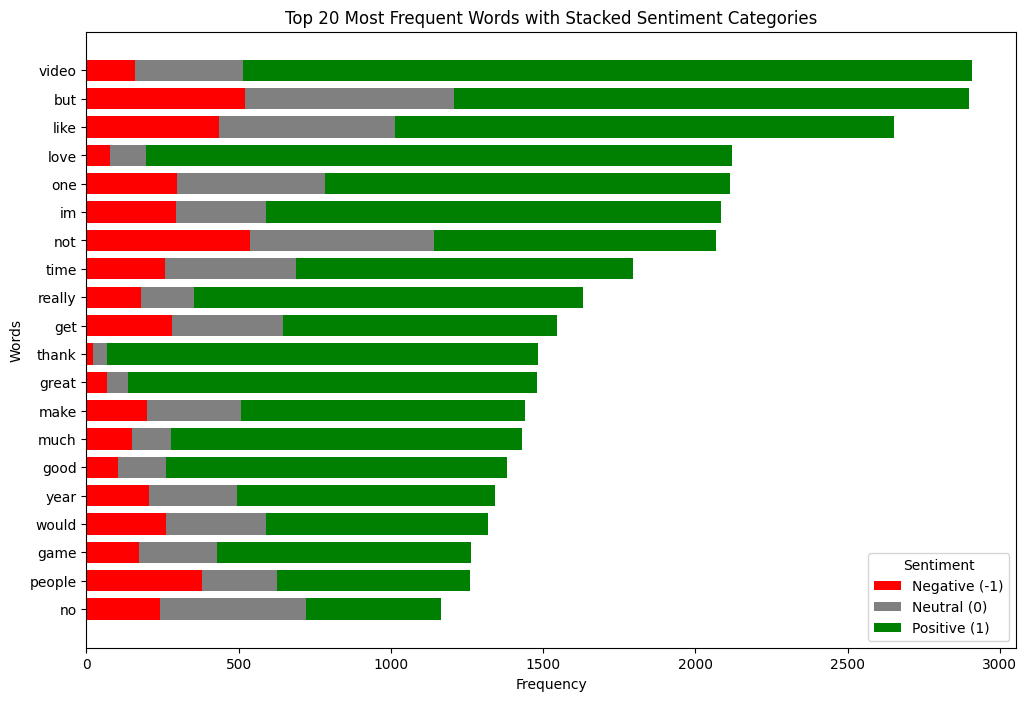

In [224]:
def plot_top_n_words_by_category(df, n=20, start=0):
    """Plot the top N most frequent words in the dataset with stacked hue based on sentiment category."""
    # Flatten all words in the content column and count their occurrences by category
    word_category_counts = {}

    for idx, row in df.iterrows():
        words = row['Comment'].split()
        category = row['Sentiment']

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = { -1: 0, 0: 0, 1: 0 }  # Initialize counts for each sentiment category

            # Increment the count for the corresponding sentiment category
            word_category_counts[word][category] += 1

    # Get total counts across all categories for each word
    total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}

    # Get the top N most frequent words across all categories
    most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start:start+n]
    top_words = [word for word, _ in most_common_words]

    # Prepare data for plotting
    word_labels = top_words
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts = [word_category_counts[word][0] for word in top_words]
    positive_counts = [word_category_counts[word][1] for word in top_words]

    # Plot the stacked bar chart
    plt.figure(figsize=(12, 8))
    bar_width = 0.75

    # Plot negative, neutral, and positive counts in a stacked manner
    plt.barh(word_labels, negative_counts, color='red', label='Negative (-1)', height=bar_width)
    plt.barh(word_labels, neutral_counts, left=negative_counts, color='gray', label='Neutral (0)', height=bar_width)
    plt.barh(word_labels, positive_counts, left=[i+j for i,j in zip(negative_counts, neutral_counts)], color='green', label='Positive (1)', height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Frequent Words with Stacked Sentiment Categories')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top
    plt.show()



plot_top_n_words_by_category(df, n=20)